In [5]:
import datetime as dt
import pandas as pd
import numpy as np
import mplfinance as mpl
%matplotlib notebook

In [6]:
ticker_name = "NSE"

In [7]:
df = pd.read_csv('C:/Users/kaush/Documents/Nifty Project/file1_2009.csv', index_col=0,parse_dates=True)
print(df)

                        Open     High      Low   Close
Date                                                  
2009-01-01 09:55:00  2976.10  2985.00  2976.10  2979.5
2009-01-01 09:56:00  2979.50  2983.00  2976.00  2983.0
2009-01-01 09:57:00  2984.10  2985.60  2982.85  2983.7
2009-01-01 09:58:00  2983.45  2983.45  2976.45  2978.3
2009-01-01 09:59:00  2977.90  2985.80  2977.90  2985.8
...                      ...      ...      ...     ...
2009-12-31 15:26:00  5203.00  5204.00  5202.00  5202.0
2009-12-31 15:27:00  5203.00  5206.00  5202.00  5205.0
2009-12-31 15:28:00  5206.00  5210.00  5205.00  5210.0
2009-12-31 15:29:00  5210.00  5214.00  5209.00  5212.0
2009-12-31 15:30:00  5211.00  5213.00  5209.00  5210.0

[76897 rows x 4 columns]


C:\ProgramData\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


<IPython.core.display.Javascript object>


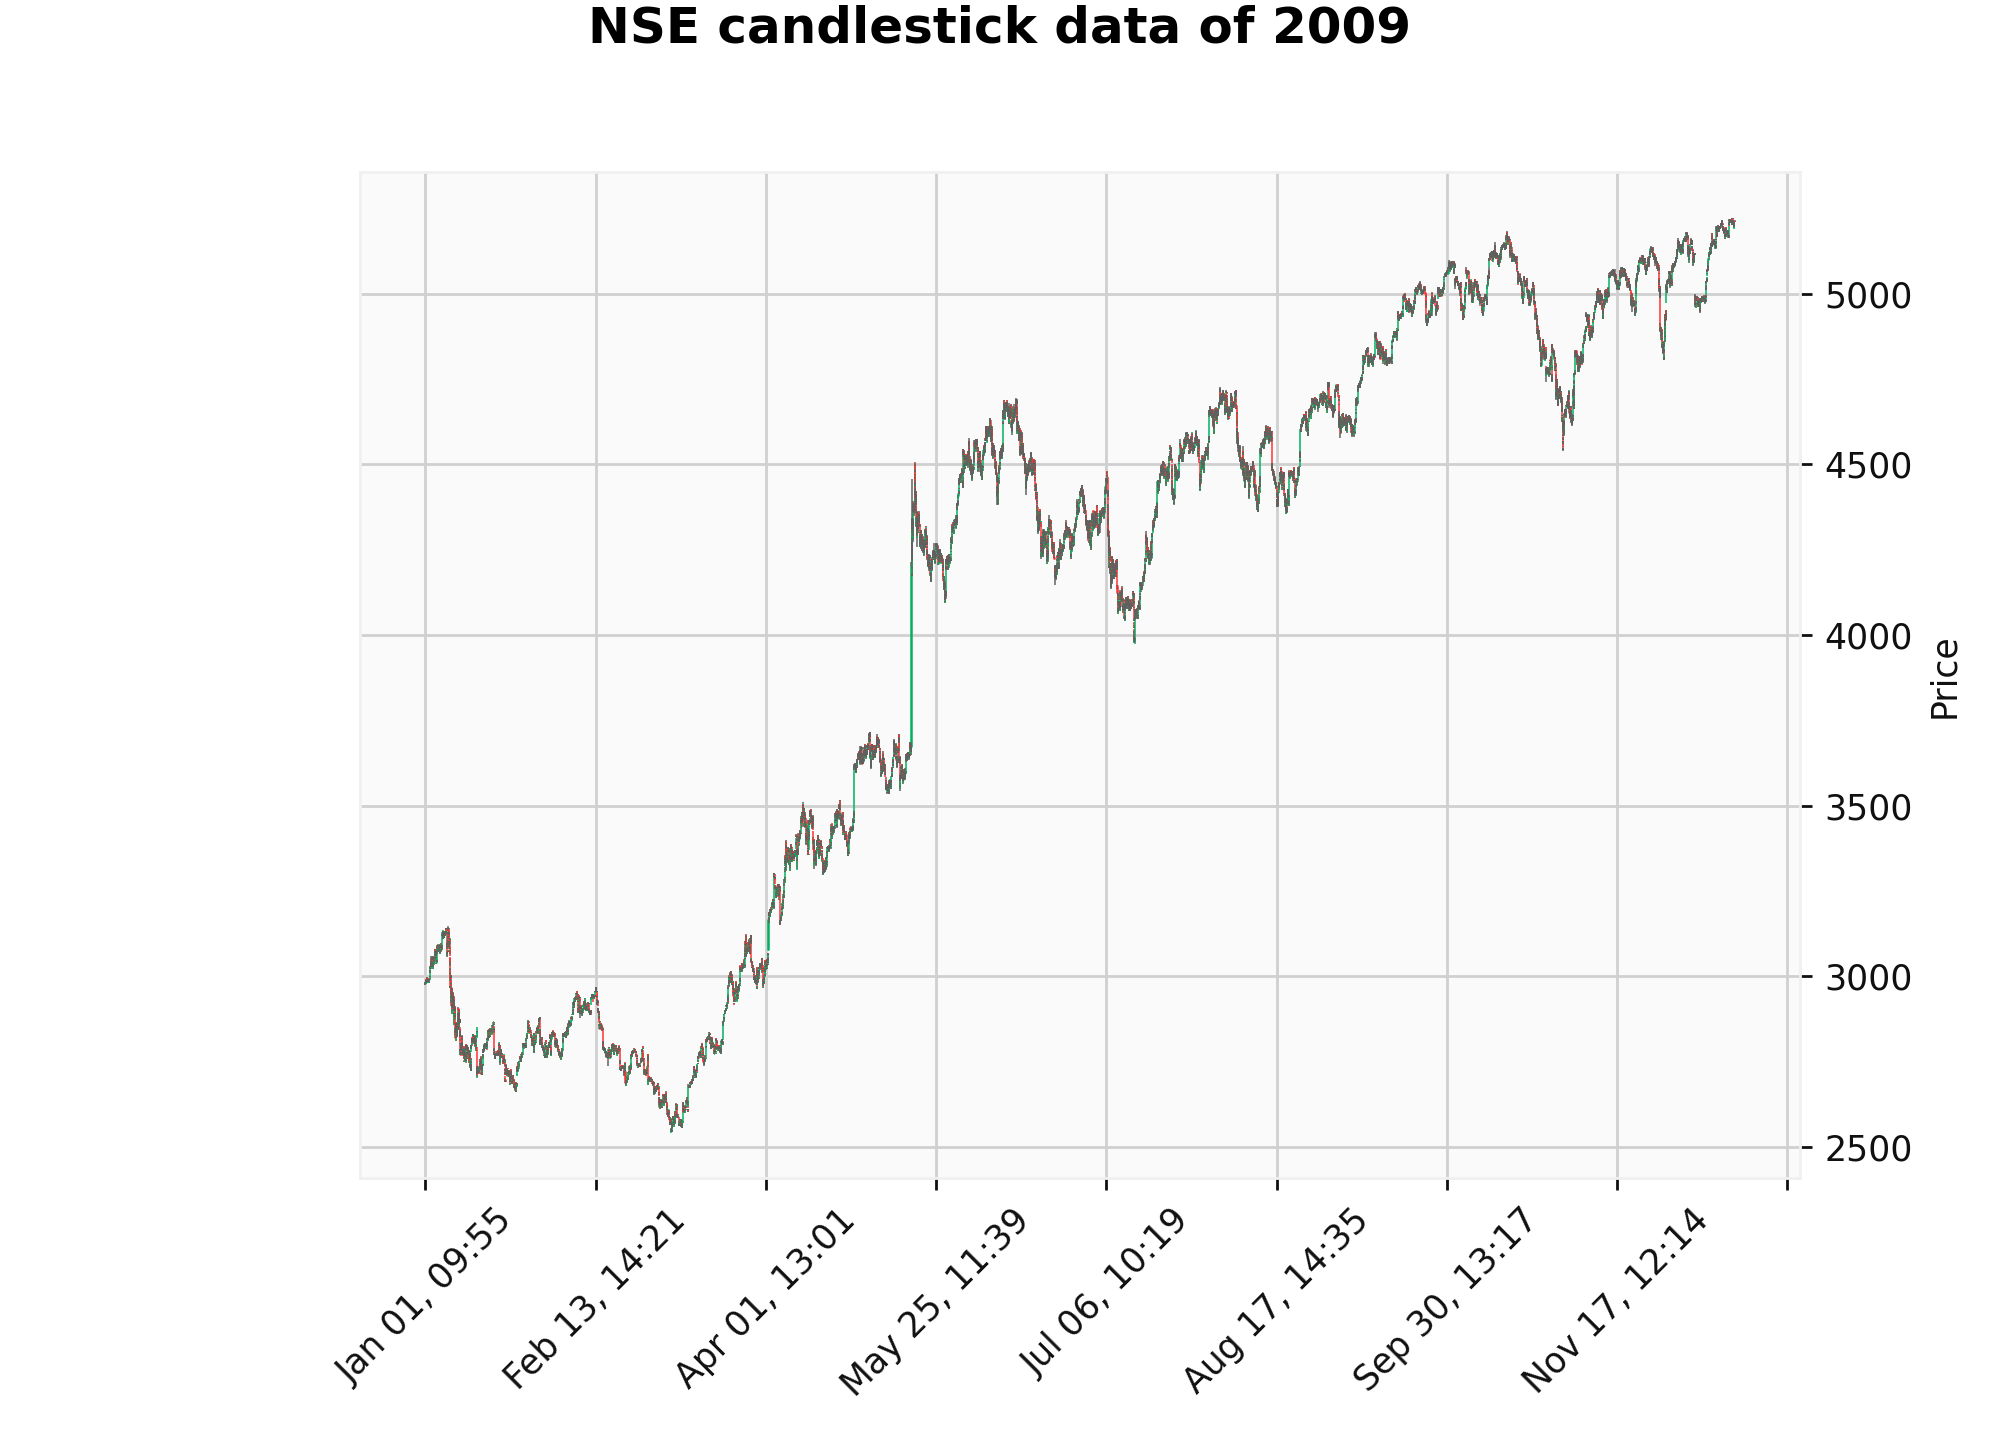

In [13]:
mpl.plot(df,type='candle',  
         style='yahoo', 
         title= "NSE candlestick data of 2009")

<IPython.core.display.Javascript object>


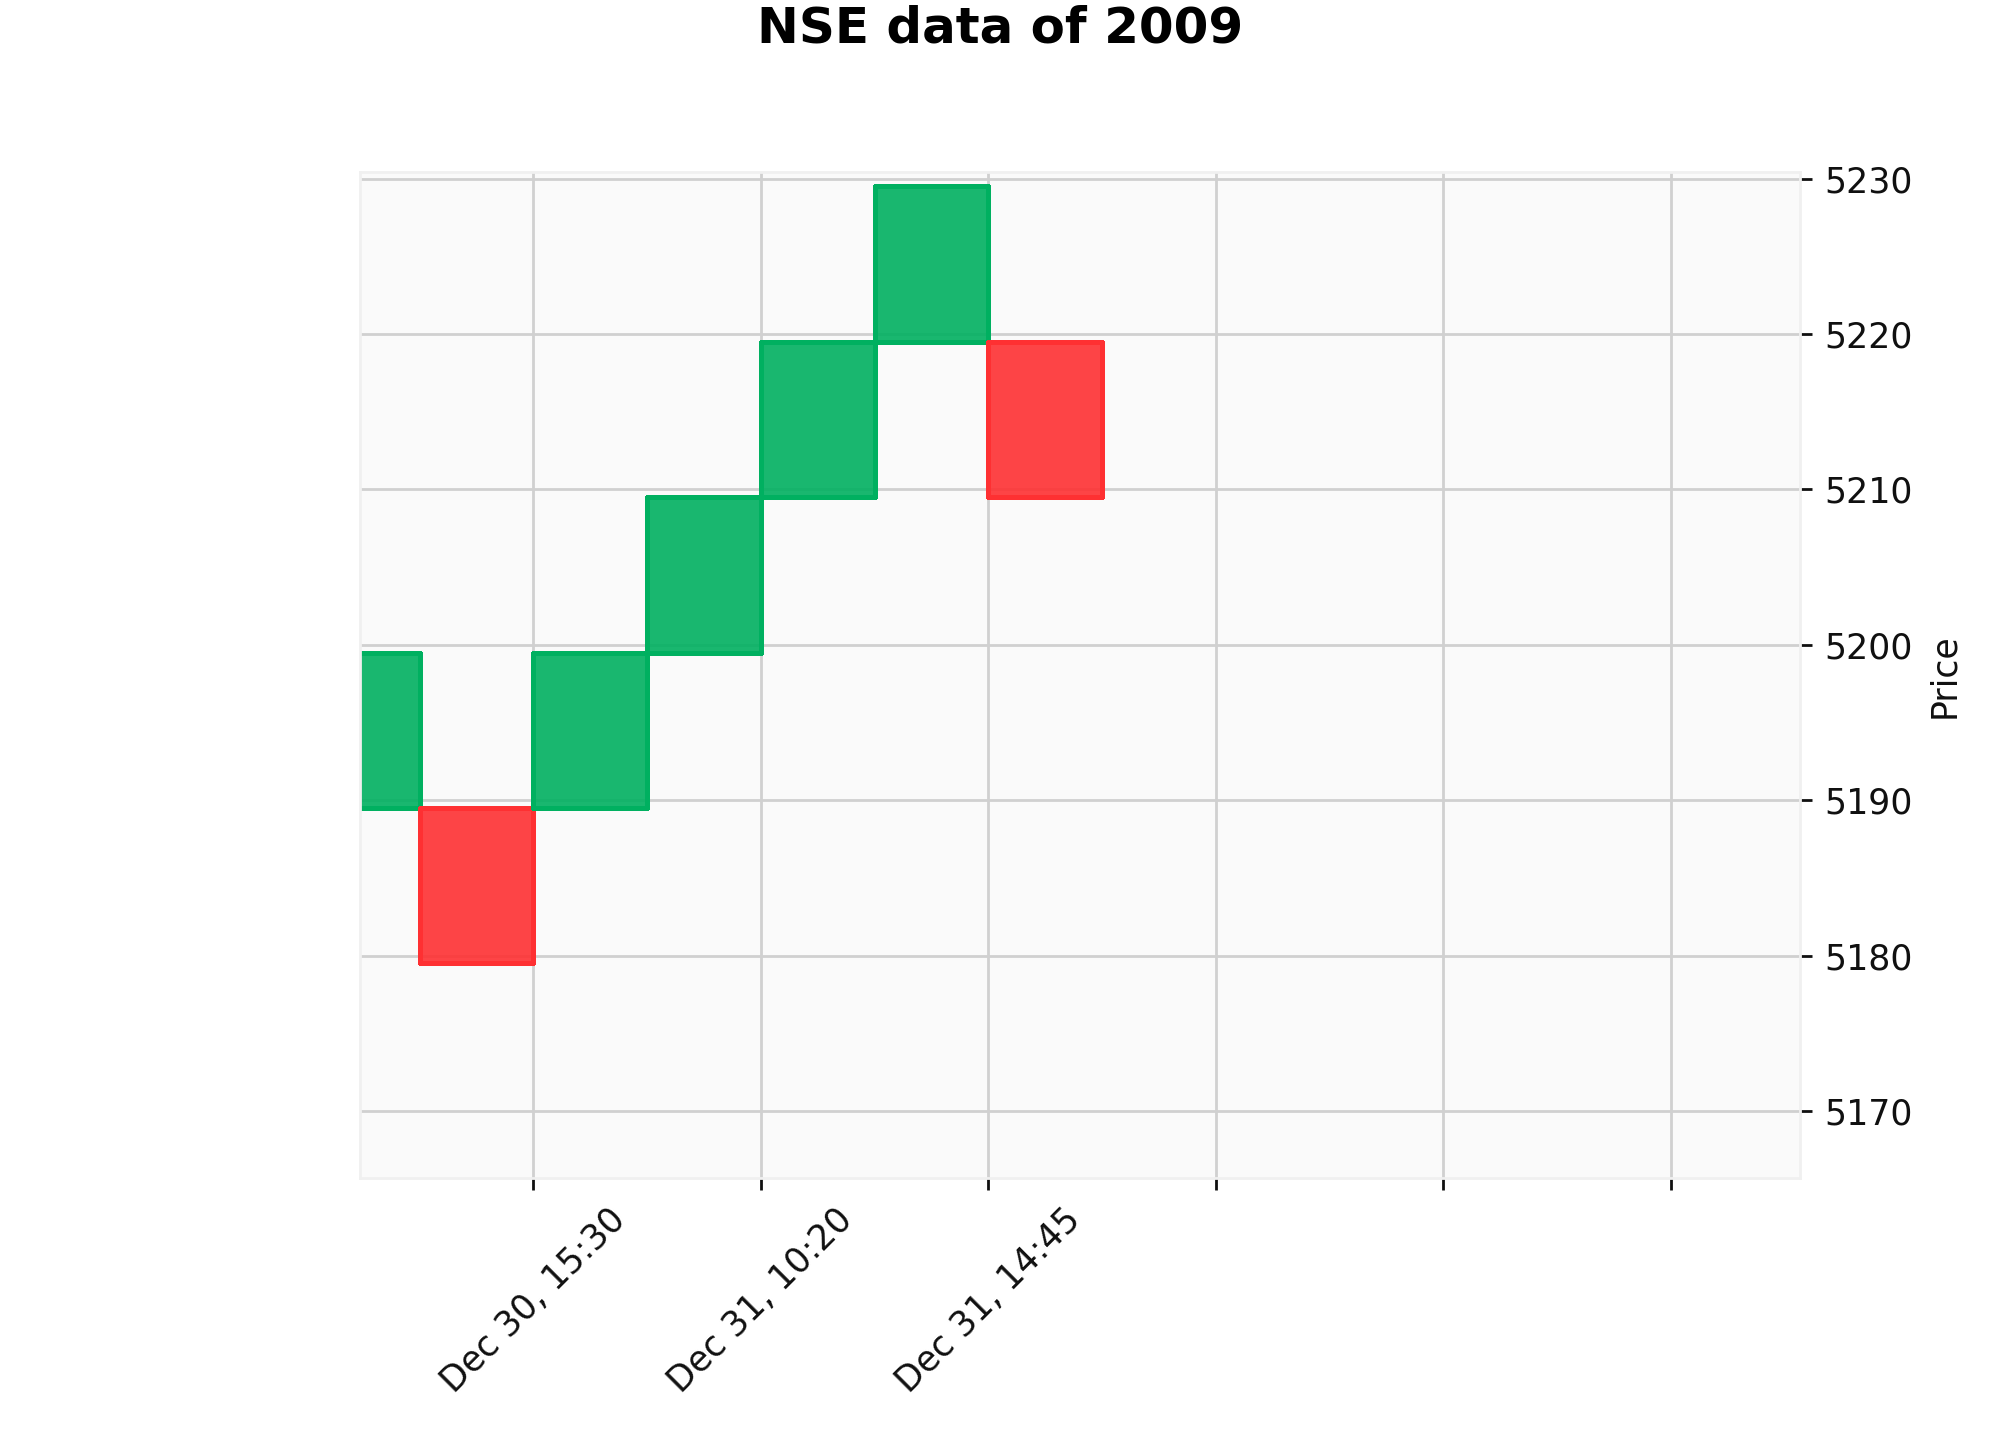

In [8]:
bricks=10
cvals = {}
fig, axlist = mpl.plot(df,type='renko', 
                       renko_params=dict(brick_size=bricks), 
                       style='yahoo', 
                       return_calculated_values=cvals,
                       returnfig=True,
                       title= "NSE renko data of 2009")
cdf = pd.DataFrame.from_dict(cvals)
cdf = cdf.set_index('renko_bricks')
cdf.to_csv('renko_2009.csv')

In [9]:
print(cdf)

                           renko_dates  renko_size renko_volumes      minx  \
renko_bricks                                                                 
2989.5       2009-01-01 10:51:00+00:00          10          None -0.999731   
2999.5       2009-01-01 14:04:00+00:00          10          None -0.999731   
3009.5       2009-01-01 14:05:00+00:00          10          None -0.999731   
3019.5       2009-01-01 14:22:00+00:00          10          None -0.999731   
3029.5       2009-01-01 14:34:00+00:00          10          None -0.999731   
...                                ...         ...           ...       ...   
5189.5       2009-12-30 15:30:00+00:00          10          None -0.999731   
5199.5       2009-12-30 15:30:00+00:00          10          None -0.999731   
5209.5       2009-12-31 10:20:00+00:00          10          None -0.999731   
5219.5       2009-12-31 13:08:00+00:00          10          None -0.999731   
5209.5       2009-12-31 14:45:00+00:00          10          None

<IPython.core.display.Javascript object>


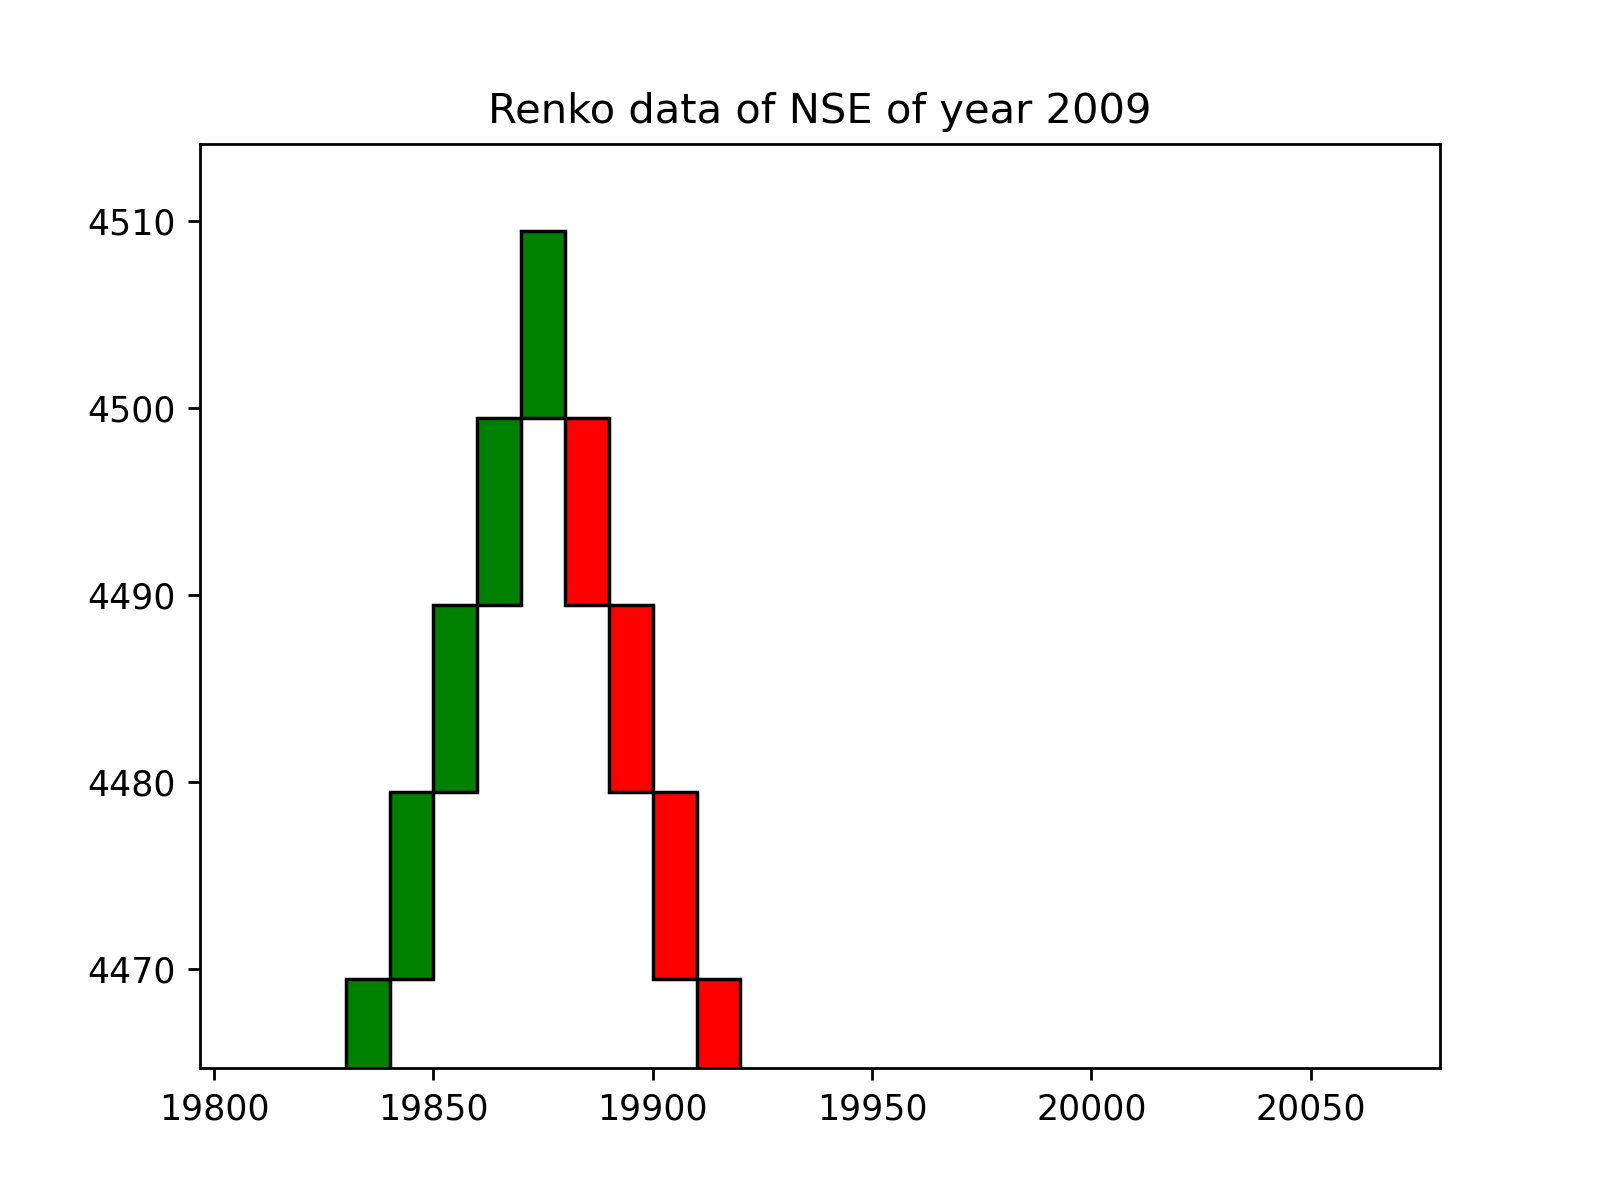

Renko data of NSE of year 2009
            Renko_date  Renko_brick     Open     High      Low    Close
0     2009-01-01 10:52       2989.5  2987.90  2991.20  2987.90  2991.20
1     2009-01-01 14:05       2999.5  2999.55  3004.05  2999.55  3004.05
2     2009-01-01 14:06       3009.5  3005.50  3011.55  3005.50  3010.60
3     2009-01-01 14:23       3019.5  3019.35  3022.95  3019.35  3022.95
4     2009-01-01 14:35       3029.5  3026.35  3030.25  3026.35  3030.25
...                ...          ...      ...      ...      ...      ...
5876  2009-12-31 10:21       5209.5  5209.00  5210.00  5209.00  5210.00
5877  2009-12-31 13:09       5219.5  5214.00  5220.00  5214.00  5220.00
5878  2009-12-31 13:52       5209.5  5214.00  5214.00  5209.00  5209.00
5879  2009-12-31 14:46       5199.5  5201.00  5201.00  5199.00  5199.00
5880  2009-12-31 15:28       5209.5  5206.00  5210.00  5205.00  5210.00

[5881 rows x 6 columns]


In [4]:
import datetime as dt
import pandas as pd
import numpy as np
import mplfinance as mpl
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
%matplotlib notebook

ticker_name = "NSE"

df = pd.read_csv('C:/Users/kaush/Documents/Nifty Project/file1_2009.csv', index_col=0,parse_dates=True)

def renko_val(df,bricks):
    dic = {'Renko_date':[],'Renko_brick':[],'Open':[],'High':[],'Low':[],'Close':[]}
    x=df.iloc[0]['Close']
    sign=[]
    for i in range(len(df)):
        if df.iloc[i]['Close'] >= x+bricks:
            br = (df.iloc[i]['Close']) - (x)
            br = br//bricks
            #print(br)
            for j in range(int(br)):
                x=x+10
                df.iloc[i]['Date']
                dic['Renko_date'].append(df.iloc[i]['Date'])
                dic['Renko_brick'].append(x)
                dic['Open'].append(df.iloc[i]['Open'])
                dic['High'].append(df.iloc[i]['High'])
                dic['Low'].append(df.iloc[i]['Low'])
                dic['Close'].append(df.iloc[i]['Close'])
                sign.append(1)
        elif df.iloc[i]['Close'] <= x-bricks:
            br = (x) - (df.iloc[i]['Close'])
            br = br//bricks
            #print(br)
            for j in range(int(br)):
                x=x-10
                dic['Renko_date'].append(df.iloc[i]['Date'])
                dic['Renko_brick'].append(x)
                dic['Open'].append(df.iloc[i]['Open'])
                dic['High'].append(df.iloc[i]['High'])
                dic['Low'].append(df.iloc[i]['Low'])
                dic['Close'].append(df.iloc[i]['Close'])
                sign.append(-1)
    rdf=pd.DataFrame.from_dict(dic)
    
    fig, ax = plt.subplots()
    for i in range(len(rdf)):
        if i==0:
            if rdf.iloc[i]['Renko_brick'] >= df.iloc[0]['Close'] +10:
                facecolor='green'
            else:
                facecolor='red'
            ax.add_patch(Rectangle(((i+1)*10,df.iloc[0]['Close']),10,10,edgecolor='black',facecolor=facecolor))
        elif i!=0:
            if sign[i-1] == 1:
                facecolor='green'
            elif sign[i-1] == -1:
                facecolor='red'
            ax.add_patch(Rectangle(((i+1)*10,rdf.iloc[i-1]['Renko_brick']),10,10,edgecolor='black',facecolor=facecolor))
    plt.xlim([0,((len(rdf)*10)+10)])
    plt.ylim([min(rdf['Renko_brick'])-100,max(rdf['Renko_brick'])+100])
    plt.title("Renko data of "+ ticker_name +" of year 2009")
    plt.show()
    
    return rdf

bricks=10    
rdf=renko_val(df, bricks)
print("Renko data of "+ ticker_name +" of year 2009")
print(rdf)
cvals = {}

In [28]:
import datetime as dt
import pandas as pd
import numpy as np
import mplfinance as mpl
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import pandas_ta as ta
import plotly as go
%matplotlib notebook

ticker_name = "NSE"

df = pd.read_csv('C:/Users/kaush/Documents/Nifty Project/file1_2009.csv', index_col=0,parse_dates=True)

def renko_val(df,bricks):
    dic = {'Renko_date':[],'Renko_brick':[],'Open':[],'High':[],'Low':[],'Close':[]}
    x=df.iloc[0]['Close']
    sign=[]
    for i in range(len(df)):
        if df.iloc[i]['Close'] >= x+bricks:
            br = (df.iloc[i]['Close']) - (x)
            br = br//bricks
            #print(br)
            for j in range(int(br)):
                x=x+10
                dic['Renko_date'].append(df.iloc[i]['Date'])
                dic['Renko_brick'].append(x)
                dic['Open'].append(df.iloc[i]['Open'])
                dic['High'].append(df.iloc[i]['High'])
                dic['Low'].append(df.iloc[i]['Low'])
                dic['Close'].append(df.iloc[i]['Close'])
                sign.append(1)
        elif df.iloc[i]['Close'] <= x-bricks:
            br = (x) - (df.iloc[i]['Close'])
            br = br//bricks
            #print(br)
            for j in range(int(br)):
                x=x-10
                dic['Renko_date'].append(df.iloc[i]['Date'])
                dic['Renko_brick'].append(x)
                dic['Open'].append(df.iloc[i]['Open'])
                dic['High'].append(df.iloc[i]['High'])
                dic['Low'].append(df.iloc[i]['Low'])
                dic['Close'].append(df.iloc[i]['Close'])
                sign.append(-1)
    rdf=pd.DataFrame.from_dict(dic)
    return rdf

def plot_rdf(df, rdf):
    sign=[]
    x=df.iloc[0]['Close']
    for i in range(len(df)):
        if df.iloc[i]['Close'] >= x+bricks:
            br = (df.iloc[i]['Close']) - (x)
            br = br//bricks
            for j in range(int(br)):
                x=x+10
                sign.append(1)
        elif df.iloc[i]['Close'] <= x-bricks:
            br = (x) - (df.iloc[i]['Close'])
            br = br//bricks
            for j in range(int(br)):
                x=x-10
                sign.append(-1)
    
    fig, ax = plt.subplots()
    for i in range(len(rdf)):
        if i==0:
            if rdf.iloc[i]['Renko_brick'] >= df.iloc[0]['Close'] +10:
                facecolor='green'
            else:
                facecolor='red'
            ax.add_patch(Rectangle(((i+1)*10,df.iloc[0]['Close']),10,10,edgecolor='black',facecolor=facecolor))
        elif i!=0:
            if sign[i-1] == 1:
                facecolor='green'
            elif sign[i-1] == -1:
                facecolor='red'
            ax.add_patch(Rectangle(((i+1)*10,rdf.iloc[i-1]['Renko_brick']),10,10,edgecolor='black',facecolor=facecolor))
    plt.xlim([0,((len(rdf)*10)+10)])
    plt.ylim([min(rdf['Renko_brick'])-100,max(rdf['Renko_brick'])+100])
        
    plt.show()

def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Renko_brick':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

def plot_macd(prices, macd, signal, hist):
    ax2 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2.plot(macd, color = 'black', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')
    
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

def plot_rsi(rdf):
    ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    ax.plot(rdf['rsi'], color = 'orange', linewidth = 1.5)
    ax.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax.set_title('Renko data 2009 RSI Index')
    plt.show()

def get_vol(rdf):
    dic={'Volume':[]}
    for i in range(len(rdf)):
        if i==0:
            dic['Volume'].append(abs((rdf.iloc[i+1]['Close']-rdf.iloc[i]['Close'])/0.05))
        else:
            dic['Volume'].append(abs((rdf.iloc[i]['Close']-rdf.iloc[i-1]['Close'])/0.05))
    df=pd.DataFrame.from_dict(dic)
    return df['Volume']
    
def vwap(df):
    v = df['Volume'].values
    tp = (df['Low'] + df['Close'] + df['High']).div(3).values
    return df.assign(vwap=(tp * v).cumsum() / v.cumsum())

bricks=10    
rdf=renko_val(df, bricks)
rdf['Volume'] = get_vol(rdf)
rdf_macd = get_macd(rdf['Renko_brick'], 26, 12, 9)
rdf['rsi'] = get_rsi(rdf['Renko_brick'], 14)
rdf=vwap(rdf)

print("Renko data of "+ ticker_name +" of year 2009")
print(rdf)

print("MACD Renko data 2009")
print(rdf_macd)

Renko data of NSE of year 2009
            Renko_date  Renko_brick     Open     High      Low    Close  \
0     2009-01-01 10:52       2989.5  2987.90  2991.20  2987.90  2991.20   
1     2009-01-01 14:05       2999.5  2999.55  3004.05  2999.55  3004.05   
2     2009-01-01 14:06       3009.5  3005.50  3011.55  3005.50  3010.60   
3     2009-01-01 14:23       3019.5  3019.35  3022.95  3019.35  3022.95   
4     2009-01-01 14:35       3029.5  3026.35  3030.25  3026.35  3030.25   
...                ...          ...      ...      ...      ...      ...   
5876  2009-12-31 10:21       5209.5  5209.00  5210.00  5209.00  5210.00   
5877  2009-12-31 13:09       5219.5  5214.00  5220.00  5214.00  5220.00   
5878  2009-12-31 13:52       5209.5  5214.00  5214.00  5209.00  5209.00   
5879  2009-12-31 14:46       5199.5  5201.00  5201.00  5199.00  5199.00   
5880  2009-12-31 15:28       5209.5  5206.00  5210.00  5205.00  5210.00   

      Volume         rsi         vwap  
0      257.0         NaN  29

In [17]:
plot_rsi(rdf)

<IPython.core.display.Javascript object>


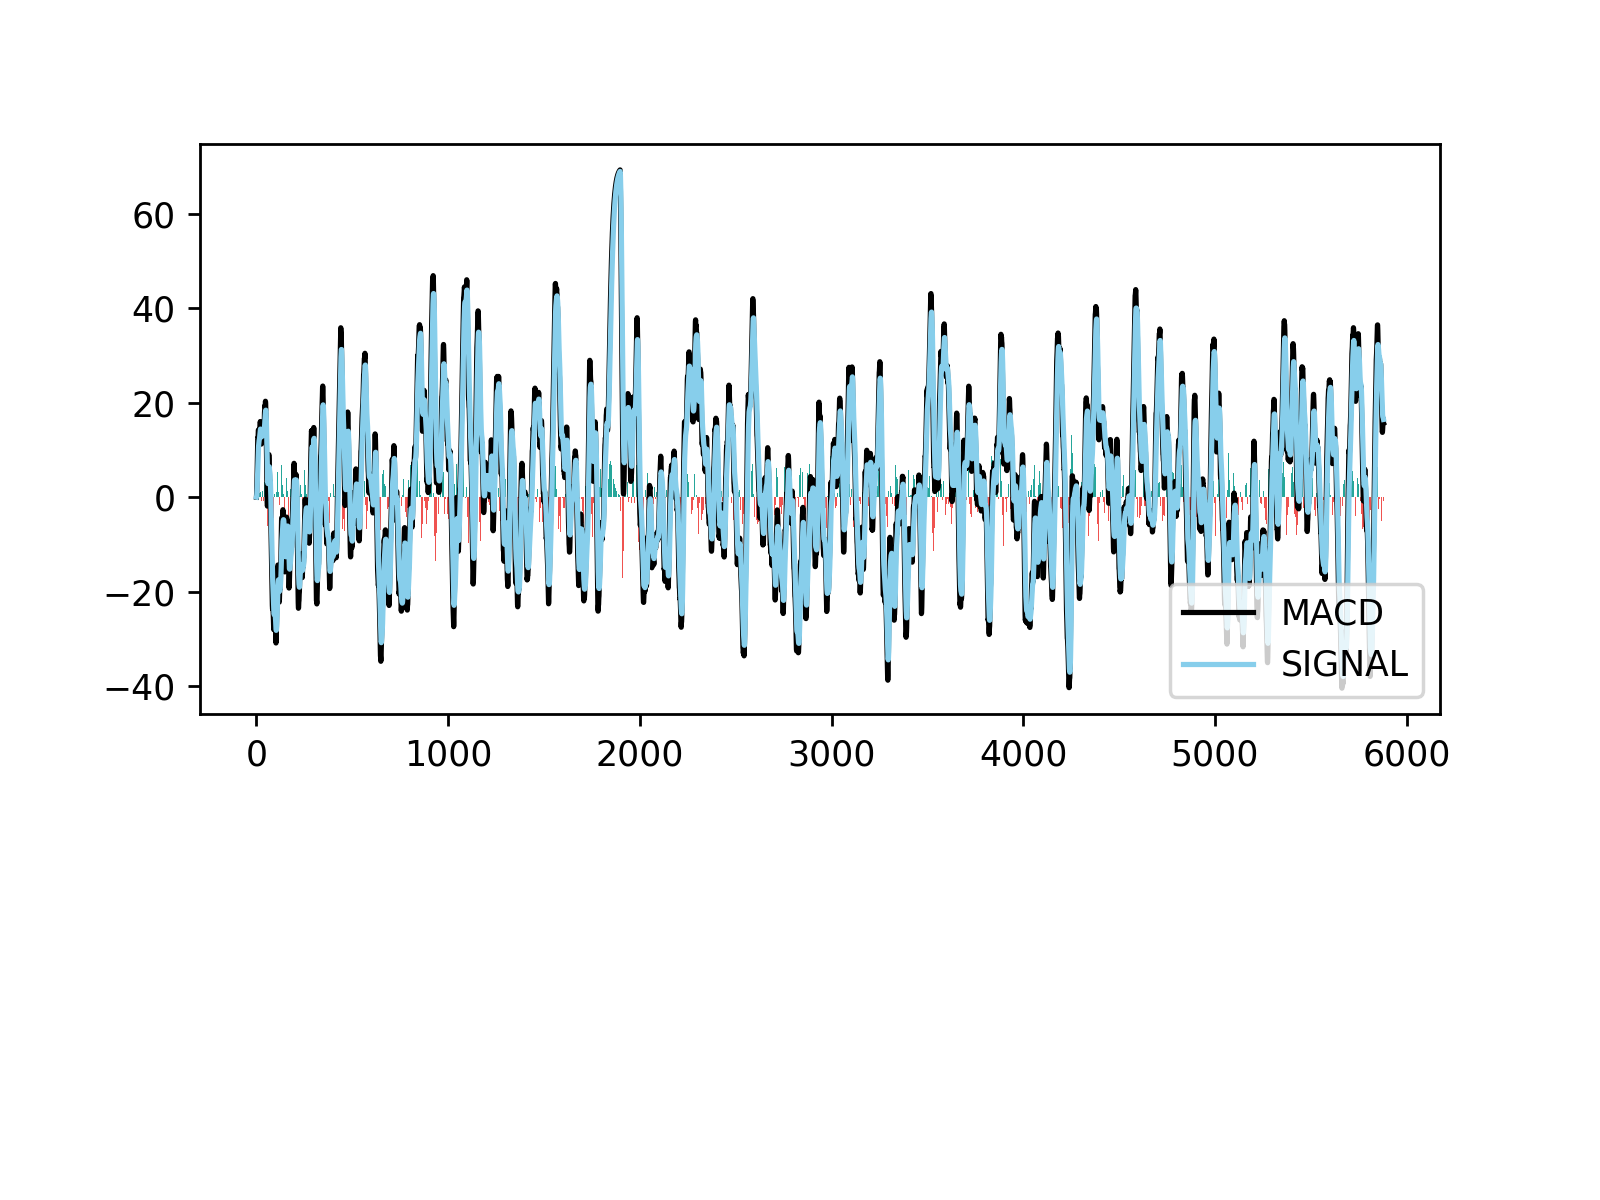

In [27]:
plot_macd(rdf['Renko_brick'], rdf_macd['macd'], rdf_macd['signal'], rdf_macd['hist'])

<IPython.core.display.Javascript object>


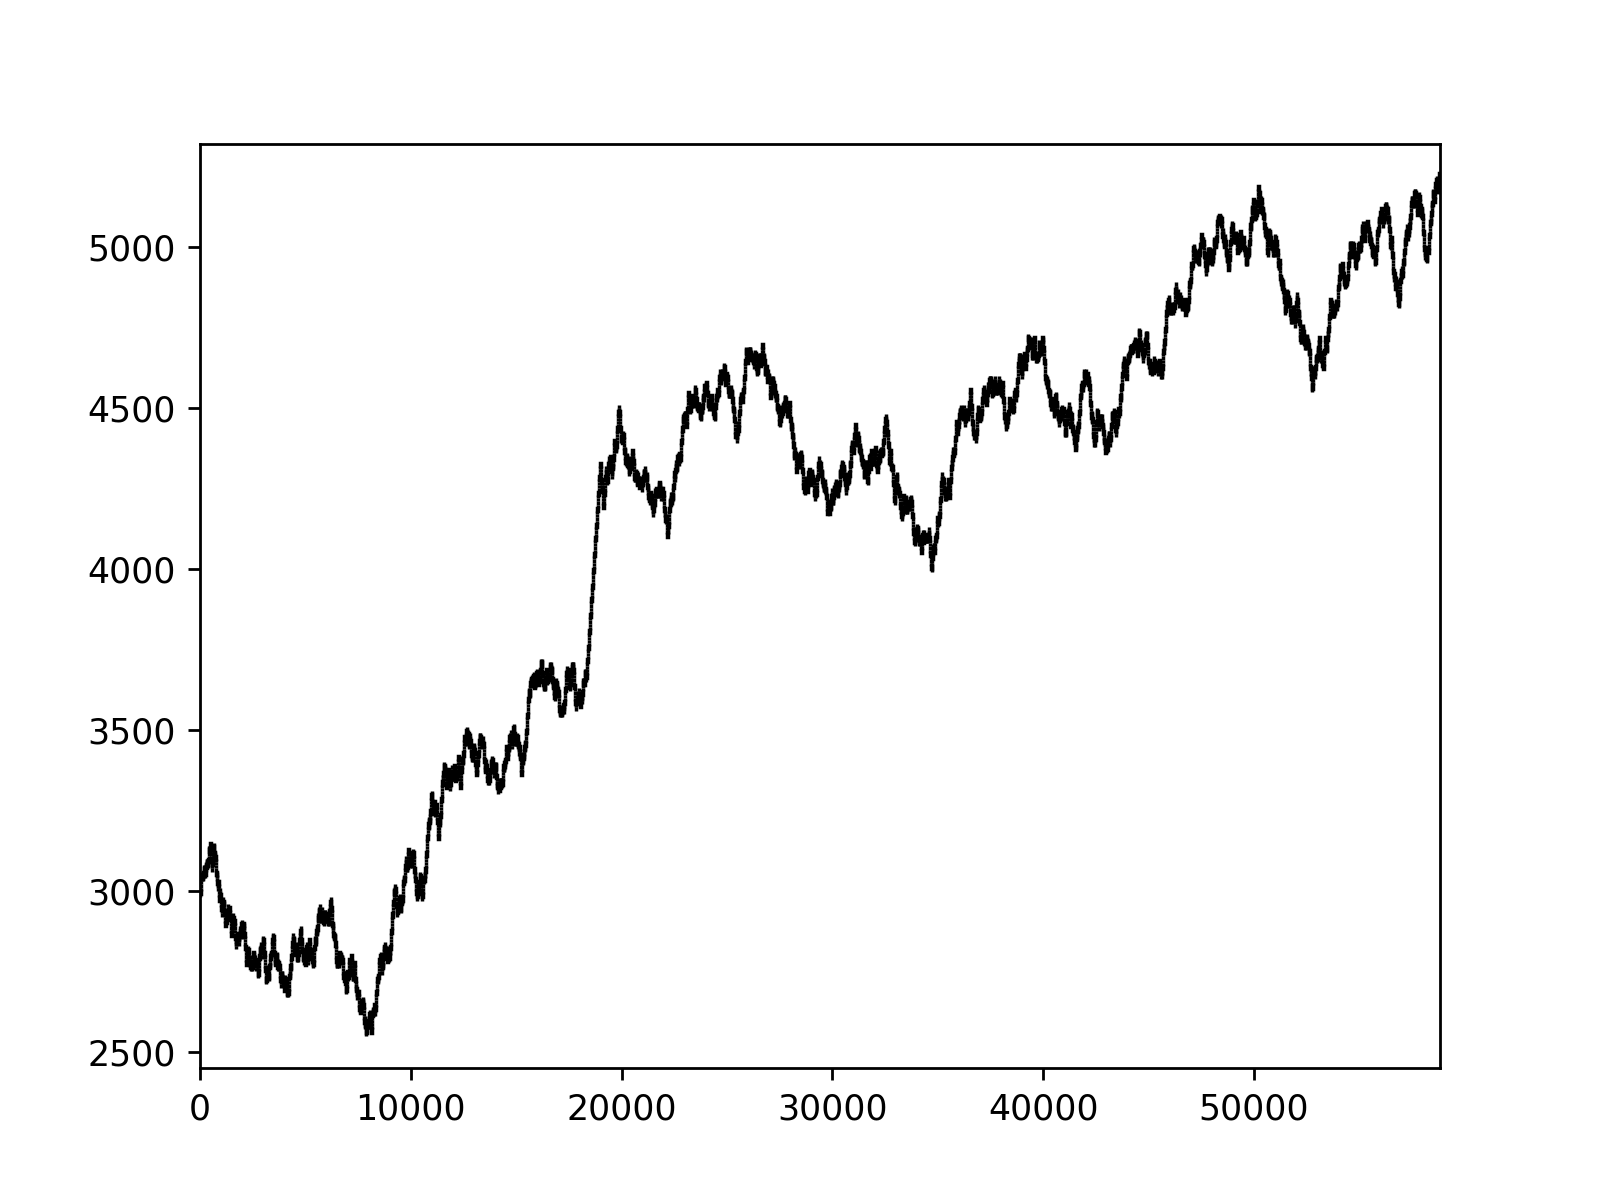

In [19]:
plot_rdf(df, rdf)

Renko data of NSE of year 2009
            Renko_date  Renko_brick     Open     High      Low    Close  \
0     2009-01-01 10:52       2989.5  2987.90  2991.20  2987.90  2991.20   
1     2009-01-01 14:05       2999.5  2999.55  3004.05  2999.55  3004.05   
2     2009-01-01 14:06       3009.5  3005.50  3011.55  3005.50  3010.60   
3     2009-01-01 14:23       3019.5  3019.35  3022.95  3019.35  3022.95   
4     2009-01-01 14:35       3029.5  3026.35  3030.25  3026.35  3030.25   
...                ...          ...      ...      ...      ...      ...   
5876  2009-12-31 10:21       5209.5  5209.00  5210.00  5209.00  5210.00   
5877  2009-12-31 13:09       5219.5  5214.00  5220.00  5214.00  5220.00   
5878  2009-12-31 13:52       5209.5  5214.00  5214.00  5209.00  5209.00   
5879  2009-12-31 14:46       5199.5  5201.00  5201.00  5199.00  5199.00   
5880  2009-12-31 15:28       5209.5  5206.00  5210.00  5205.00  5210.00   

      Volume         rsi         vwap  
0      257.0         NaN  29

<IPython.core.display.Javascript object>


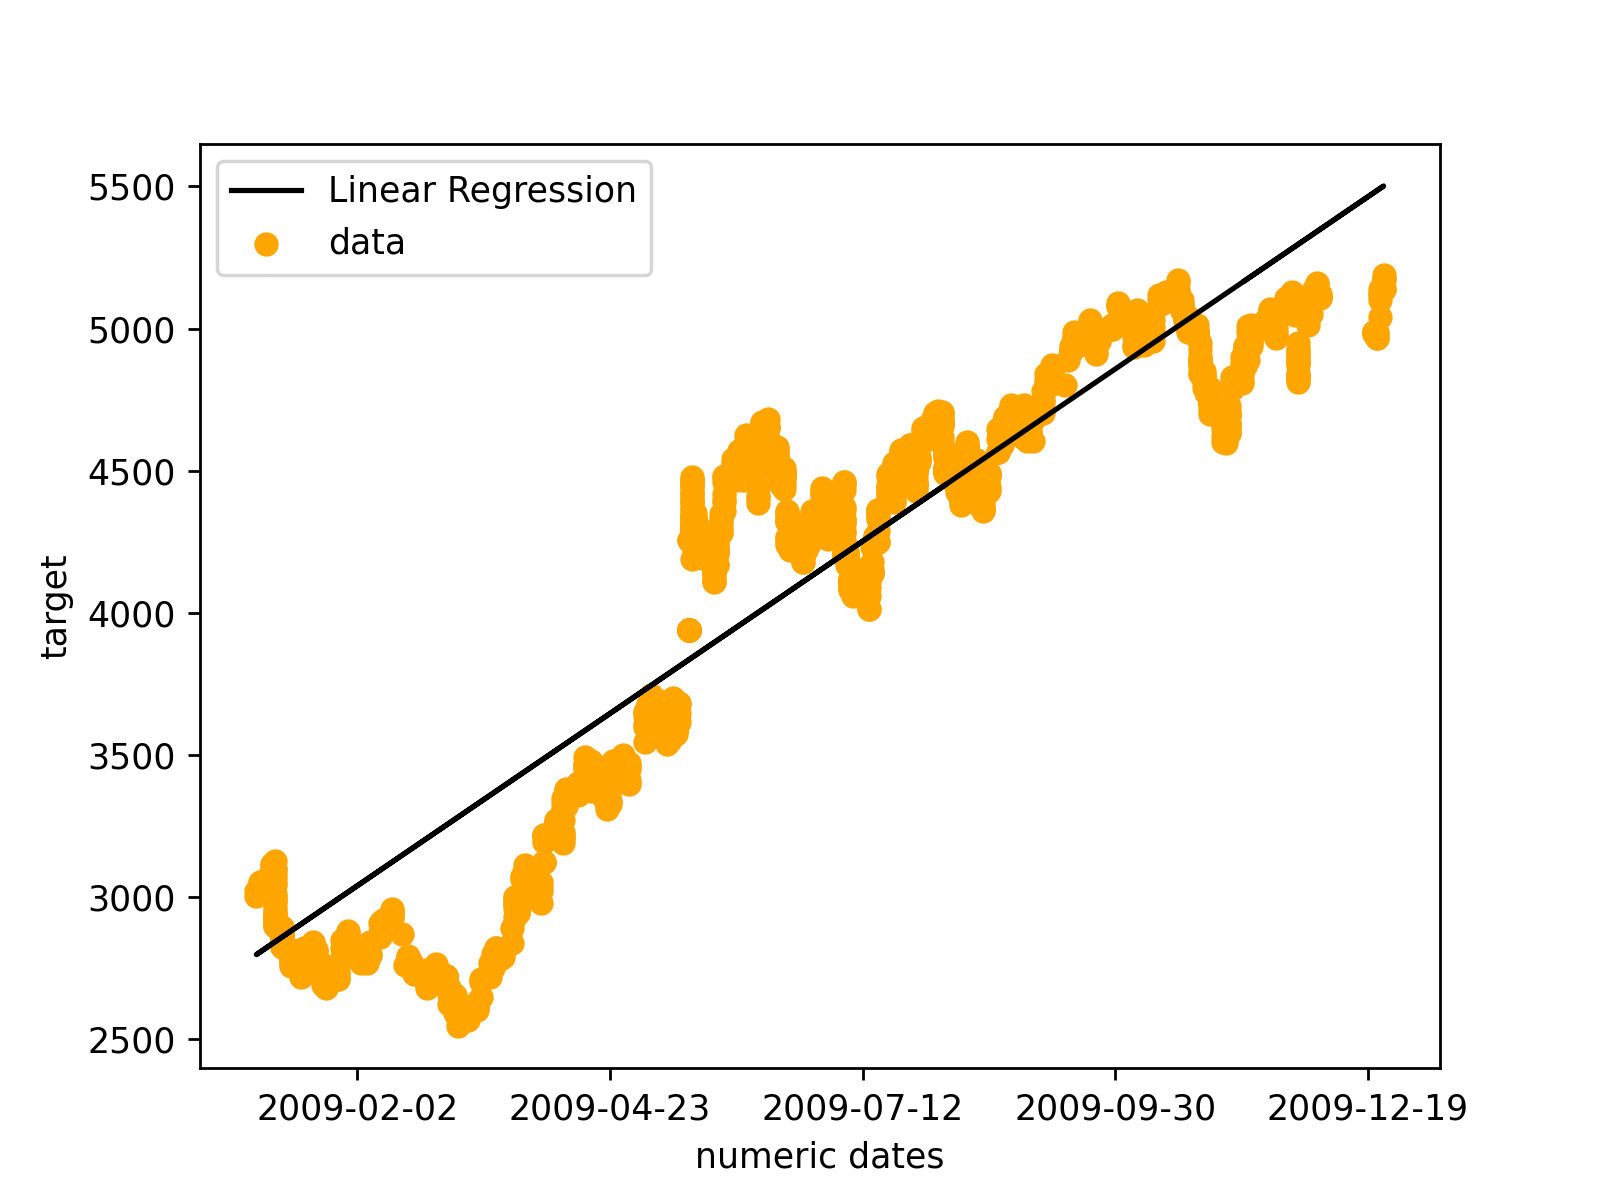

In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import mplfinance as mpl
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas_ta as ta
import plotly as go
from sklearn import linear_model
from sklearn.model_selection import train_test_split

ticker_name = "NSE"

df = pd.read_csv('C:/Users/kaush/Documents/Nifty Project/file1_2009.csv', index_col=0,parse_dates=True)

def renko_val(df,bricks):
    dic = {'Renko_date':[],'Renko_brick':[],'Open':[],'High':[],'Low':[],'Close':[]}
    x=df.iloc[0]['Close']
    sign=[]
    for i in range(len(df)):
        if df.iloc[i]['Close'] >= x+bricks:
            br = (df.iloc[i]['Close']) - (x)
            br = br//bricks
            #print(br)
            for j in range(int(br)):
                x=x+10
                dic['Renko_date'].append(df.iloc[i]['Date'])
                dic['Renko_brick'].append(x)
                dic['Open'].append(df.iloc[i]['Open'])
                dic['High'].append(df.iloc[i]['High'])
                dic['Low'].append(df.iloc[i]['Low'])
                dic['Close'].append(df.iloc[i]['Close'])
                sign.append(1)
        elif df.iloc[i]['Close'] <= x-bricks:
            br = (x) - (df.iloc[i]['Close'])
            br = br//bricks
            #print(br)
            for j in range(int(br)):
                x=x-10
                dic['Renko_date'].append(df.iloc[i]['Date'])
                dic['Renko_brick'].append(x)
                dic['Open'].append(df.iloc[i]['Open'])
                dic['High'].append(df.iloc[i]['High'])
                dic['Low'].append(df.iloc[i]['Low'])
                dic['Close'].append(df.iloc[i]['Close'])
                sign.append(-1)
    rdf=pd.DataFrame.from_dict(dic)
    return rdf

def plot_rdf(df, rdf):
    sign=[]
    x=df.iloc[0]['Close']
    for i in range(len(df)):
        if df.iloc[i]['Close'] >= x+bricks:
            br = (df.iloc[i]['Close']) - (x)
            br = br//bricks
            for j in range(int(br)):
                x=x+10
                sign.append(1)
        elif df.iloc[i]['Close'] <= x-bricks:
            br = (x) - (df.iloc[i]['Close'])
            br = br//bricks
            for j in range(int(br)):
                x=x-10
                sign.append(-1)
    
    fig, ax = plt.subplots()
    for i in range(len(rdf)):
        if i==0:
            if rdf.iloc[i]['Renko_brick'] >= df.iloc[0]['Close'] +10:
                facecolor='green'
            else:
                facecolor='red'
            ax.add_patch(Rectangle(((i+1)*10,df.iloc[0]['Close']),10,10,edgecolor='black',facecolor=facecolor))
        elif i!=0:
            if sign[i-1] == 1:
                facecolor='green'
            elif sign[i-1] == -1:
                facecolor='red'
            ax.add_patch(Rectangle(((i+1)*10,rdf.iloc[i-1]['Renko_brick']),10,10,edgecolor='black',facecolor=facecolor))
    plt.xlim([0,((len(rdf)*10)+10)])
    plt.ylim([min(rdf['Renko_brick'])-100,max(rdf['Renko_brick'])+100])
    plt.title("Renko bricks of NSE 2009 data")
        
    plt.show()

def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

def plot_macd(prices, macd, signal, hist):
    ax2 = plt.subplot2grid((8,1), (0,0), rowspan = 7, colspan = 1)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')
            
    ax2.set_title('Renko data 2009 MACD, Signal and Histogram')
    plt.legend(loc = 'lower right')
    
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

def plot_rsi(rdf):
    fig, ax = plt.subplots()
    ax = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
    ax.plot(rdf['rsi'], color = 'orange', linewidth = 1.5)
    ax.axhline(30, linestyle = '--', linewidth = 1, color = 'grey')
    ax.axhline(70, linestyle = '--', linewidth = 1, color = 'grey')
    ax.set_title('Renko data 2009 RSI Index')
    plt.show()
    
def get_vol(rdf):
    dic={'Volume':[]}
    for i in range(len(rdf)):
        if i==0:
            dic['Volume'].append(abs((rdf.iloc[i+1]['Close']-rdf.iloc[i]['Close'])/0.05))
        else:
            dic['Volume'].append(abs((rdf.iloc[i]['Close']-rdf.iloc[i-1]['Close'])/0.05))
    df=pd.DataFrame.from_dict(dic)
    return df['Volume']

def vwap(df):
    v = df['Volume'].values
    tp = (df['Low'] + df['Close'] + df['High']).div(3).values
    return df.assign(vwap=(tp * v).cumsum() / v.cumsum())

def regression_predict(dates_train, dates_test, OHLC_train):
	lin_model = linear_model.LinearRegression()
	lin_model.fit(dates_train,OHLC_train)
	predicted_price = lin_model.predict(dates_test)
	return predicted_price

bricks=10    
rdf=renko_val(df, bricks)
rdf_macd = get_macd(rdf['Close'], 26, 12, 9)
rdf['Volume'] = get_vol(rdf)
rdf['rsi'] = get_rsi(rdf['Close'], 14)
rdf=vwap(rdf)

print("Renko data of "+ ticker_name +" of year 2009")
print(rdf)

print("MACD Renko data 2009")
print(rdf_macd)

price_high = rdf['High']
price_low = rdf['Low']
price_open = rdf['Open']
price_close = rdf['Close']
#from these prices calculate the OHLC average for the Google stocks
price_ave= (price_high[:]+price_low[:]+price_open[:]+price_close[:])/4

dates = rdf['Renko_date']
volume = rdf['Volume']
#convert date format to numeric format
dates = pd.to_datetime(rdf['Renko_date'])
dates = dates.map(dt.datetime.toordinal)
dates = np.array(dates).reshape((-1,1))

dates_train, dates_test, OHLC_train, OHLC_test = train_test_split(dates,price_ave,test_size=0.25)

pred_linear = regression_predict(dates_train, dates_test, OHLC_train)

d=list(rdf['Renko_date'])

chk=[]
for i in OHLC_test:
    chk.append(OHLC_test[OHLC_test == i].index[0])
reg_dates={'Date':[], 'Open':[], 'High':[], 'Close':[], 'Low':[]}
for i in chk:
    reg_dates['Date'].append(rdf.iloc[i]['Renko_date'])
    reg_dates['Open'].append(rdf.iloc[i]['Open'])
    reg_dates['High'].append(rdf.iloc[i]['High'])
    reg_dates['Low'].append(rdf.iloc[i]['Low'])
    reg_dates['Close'].append(rdf.iloc[i]['Close'])
lin_reg = pd.DataFrame.from_dict(reg_dates)
lin_reg['Pred_lin'] = pred_linear

print("Linear Regression values vs actual values")
print(lin_reg)

plt.figure(1)
ax = plt.subplot2grid((1,1),(0,0))
plt.scatter(dates_test, OHLC_test, color='orange', label='data')
plt.plot(dates_test,pred_linear,color='black', label='Linear Regression')
plt.xlabel('numeric dates')
plt.ylabel('target')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
plt.legend()
plt.show()